In [134]:

import numpy as np
import csv
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json
%matplotlib inline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

In [2]:
salaryListings = pd.read_csv('~/Documents/SearchListings.csv')
salaryListings.columns

Index([u'Unnamed: 0', u'City Location', u'Company Name', u'Description',
       u'Job Title', u'Salary Level', u'Search Criteria', u'high', u'low',
       u'medium'],
      dtype='object')

In [3]:
salaryListings.head(3)

,Unnamed: 0,City Location,Company Name,Description,Job Title,Salary Level,Search Criteria,high,low,medium
0,0,"Chicago, IL",Precima,The Data Scientist will provide process execution support for client projects. Take analytical objectives and define data requirements....,Data Scientist,low,data scientist,0.0,1.0,0.0
1,1,"Chicago, IL 60601",HERE,With big data in Hadoop and/or Spark for data extraction and data prep for. Solutions and organizing teams of other data scientists and engineers to....,Principal Data Scientist,low,data scientist,0.0,1.0,0.0
2,2,"Lake Forest, IL",ABBOTT LABORATORIES,"Professional experience analyzing data and generating relevant and actionable insights. Bachelor’s Degree required (Business, Data Analytics or Supply-Chain...","Data Scientist - Abbott Nutrition - Lake Forest, IL",low,data scientist,0.0,1.0,0.0


In [6]:
#Job title so see if anything is strange
salaryListings['Job Title']

0                                                        Data Scientist
1                                              Principal Data Scientist
2                   Data Scientist - Abbott Nutrition - Lake Forest, IL
3                                                        Data Scientist
4                                Chief Data Scientist (equity position)
5                                                 Senior Data Scientist
6                                                        Data Scientist
7                                         Quantitative Research Analyst
8                           AVP, Credit Innovation Data Scientist (L11)
9                                                        Data Scientist
10                                                Senior Data Scientist
11                                                       Data Scientist
12                                                       Data Scientist
13                  Data Scientist - Abbott Nutrition - Lake For

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(
    binary=True,  # Create binary features
    stop_words='english', # Ignore common words such as 'the', 'and'
    max_features=50, # Only use the top 50 most common words
)

In [8]:

#This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
wordsJobTitle = v.fit_transform(salaryListings['Job Title']).todense()     #no difference between data.title and data['title]
wordsJobTitle = pd.DataFrame(wordsJobTitle, columns=v.get_feature_names())
wordsJobTitle.head()

,2017,account,advanced,analyst,analytics,architect,assistant,associate,big,business,client,clinical,cloud,consultant,credit,data,developer,development,digital,director,engineer,engineering,internship,lead,learning,machine,management,manager,market,marketing,modeling,opportunity,predictive,principal,product,python,quantitative,relocation,research,risk,science,scientist,senior,software,solutions,sr,statistical,statistician,technical,technology
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [9]:
#I want to group words together that similar that might describe a job level
#Chief and Junior would not be grouped together.
print wordsJobTitle.sum().sort_values(ascending=False)

data            501
scientist       459
senior          252
engineer        186
analyst         168
research        144
manager         111
software        104
analytics        91
developer        76
machine          73
learning         72
sr               56
development      56
quantitative     54
director         50
lead             43
principal        42
associate        42
statistical      39
product          38
science          38
big              37
engineering      30
technology       23
2017             22
digital          22
architect        21
clinical         21
statistician     20
relocation       20
credit           18
advanced         18
management       17
cloud            16
marketing        16
market           16
consultant       15
risk             15
solutions        15
python           14
modeling         14
assistant        14
internship       14
technical        14
predictive       13
client           13
account          13
opportunity      12
business         12


In [10]:
#x=count_vectorizer.fit_transform(data.title).todense()
#This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
wordsInDesc = v.fit_transform(salaryListings['Description']).todense()     #no difference between data.title and data['title]
wordsInDesc = pd.DataFrame(wordsInDesc, columns=v.get_feature_names())
wordsInDesc.head()

,analysis,analyst,analysts,analytics,big,building,business,data,design,develop,developing,development,engineers,experience,experts,including,join,large,learning,looking,machine,management,mining,modeling,models,new,product,provide,quality,research,responsible,role,science,scientist,scientists,senior,sets,software,solutions,statistical,support,team,teams,technical,technology,tools,using,visualization,work,working
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [11]:
print wordsInDesc.sum().sort_values(ascending=False)

data             1144
scientists        351
scientist         332
experience        236
team              168
analysis          161
research          140
analytics         124
engineers         120
work              109
big               104
looking           102
working           101
science            99
machine            97
statistical        89
learning           88
using              88
business           84
large              83
analysts           80
management         79
software           78
develop            78
senior             71
support            70
sets               68
modeling           67
role               67
new                63
technical          62
design             61
product            59
building           59
join               57
solutions          54
mining             53
models             53
including          53
analyst            52
provide            50
teams              49
technology         48
tools              48
developing         46
quality   

In [ ]:
#putting the dataframes together for salary and words in job title

In [12]:
listingsCategories=pd.concat([salaryListings, wordsJobTitle],axis =1)

In [13]:
listingsCategories.head(1)

,Unnamed: 0,City Location,Company Name,Description,Job Title,Salary Level,Search Criteria,high,low,medium,2017,account,advanced,analyst,analytics,architect,assistant,associate,big,business,client,clinical,cloud,consultant,credit,...,machine,management,manager,market,marketing,modeling,opportunity,predictive,principal,product,python,quantitative,relocation,research,risk,science,scientist,senior,software,solutions,sr,statistical,statistician,technical,technology
0,0,"Chicago, IL",Precima,The Data Scientist will provide process execution support for client projects. Take analytical objectives and define data requirements....,Data Scientist,low,data scientist,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [14]:
#splitting out city and then renaming
salaryListings=pd.concat([salaryListings, 
                          salaryListings['City Location'].str.split(',',expand=True)],axis=1)

In [16]:
salaryListings.columns

Index([     u'Unnamed: 0',   u'City Location',    u'Company Name',
           u'Description',       u'Job Title',    u'Salary Level',
       u'Search Criteria',            u'high',             u'low',
                u'medium',                  0,                  1],
      dtype='object')

In [17]:
salaryListings.columns=['unNamed', 'City Location','Company Name',
                       'Description','Job Title','Salary Level','Search Criteria',
                       'high','low','medium','City', 'State Zip']

In [18]:
salaryListings.columns

Index([u'unNamed', u'City Location', u'Company Name', u'Description',
       u'Job Title', u'Salary Level', u'Search Criteria', u'high', u'low',
       u'medium', u'City', u'State Zip'],
      dtype='object')

In [19]:
salaryListings.head(1)

,unNamed,City Location,Company Name,Description,Job Title,Salary Level,Search Criteria,high,low,medium,City,State Zip
0,0,"Chicago, IL",Precima,The Data Scientist will provide process execution support for client projects. Take analytical objectives and define data requirements....,Data Scientist,low,data scientist,0.0,1.0,0.0,Chicago,IL


In [20]:
#splitting out the state and then renaming columns

salaryListings=pd.concat([salaryListings, 
                          salaryListings['State Zip'].str.split(' ',2,expand=True)],axis=1)

In [22]:
#now to rename columns
salaryListings.columns

Index([        u'unNamed',   u'City Location',    u'Company Name',
           u'Description',       u'Job Title',    u'Salary Level',
       u'Search Criteria',            u'high',             u'low',
                u'medium',            u'City',       u'State Zip',
                        0,                  1,                  2],
      dtype='object')

In [26]:
salaryListings.columns=['unNamed', 'City Location','Company Name',
                       'Description','Job Title','Salary Level','Search Criteria',
                       'high','low','medium','City', 'State Zip','blank',
                      'State','Zip']

In [27]:
salaryListings.columns


Index([u'unNamed', u'City Location', u'Company Name', u'Description',
       u'Job Title', u'Salary Level', u'Search Criteria', u'high', u'low',
       u'medium', u'City', u'State Zip', u'blank', u'State', u'Zip'],
      dtype='object')

In [29]:
salaryListings['Company Name'].value_counts()

Civis Analytics                                          60
IBM                                                      29
Amazon Corporate LLC                                     27
Allstate Insurance                                       25
University of Chicago                                    24
CDK Global                                               22
University of Texas at Austin                            20
Workbridge Associates                                    20
Tempus                                                   18
Procter & Gamble                                         17
Jobspring Partners                                       16
HomeAway                                                 16
Indeed                                                   15
P&G                                                      15
Morningstar                                              14
HDR                                                      14
MaxPoint                                

In [ ]:
# for i in range(0,10):
#     print searchCriteria[i]
#     print jobTitle[i]
#     print companyName[i].lstrip().replace('\n','')
#     print cityLocation[i].replace('\n','')
#     print salaryRange[i]
#     print description[i].replace('\n','')
#     print '\n''\n'

In [ ]:
#Shouldnt need to use
#salaryListings['Company Name']=salaryListings['Company Name'].str.strip()

In [37]:
#creating dummies by state####################################

stateDummies = pd.get_dummies(salaryListings['State'])

In [38]:
stateDummies.head()

,IL,IN,KY,OH,TX
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [42]:
salaryListings=pd.concat([salaryListings, stateDummies],axis=1)

In [43]:
salaryListings.head()

,unNamed,City Location,Company Name,Description,Job Title,Salary Level,Search Criteria,high,low,medium,City,State Zip,blank,State,Zip,2017,account,advanced,analyst,analytics,architect,assistant,associate,big,business,...,modeling,opportunity,predictive,principal,product,python,quantitative,relocation,research,risk,science,scientist,senior,software,solutions,sr,statistical,statistician,technical,technology,IL,IN,KY,OH,TX
0,0,"Chicago, IL",Precima,The Data Scientist will provide process execution support for client projects. Take analytical objectives and define data requirements....,Data Scientist,low,data scientist,0.0,1.0,0.0,Chicago,IL,,IL,None,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,1,"Chicago, IL 60601",HERE,With big data in Hadoop and/or Spark for data extraction and data prep for. Solutions and organizing teams of other data scientists and engineers to....,Principal Data Scientist,low,data scientist,0.0,1.0,0.0,Chicago,IL 60601,,IL,60601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,2,"Lake Forest, IL",ABBOTT LABORATORIES,"Professional experience analyzing data and generating relevant and actionable insights. Bachelor’s Degree required (Business, Data Analytics or Supply-Chain...","Data Scientist - Abbott Nutrition - Lake Forest, IL",low,data scientist,0.0,1.0,0.0,Lake Forest,IL,,IL,None,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,3,"Chicago, IL",The University of Chicago Medicine,"\nThe Data Scientist will also be responsible for data profiling/cleansing data governance consultation, data quality assessment, data mart mapping and data...",Data Scientist,low,data scientist,0.0,1.0,0.0,Chicago,IL,,IL,None,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,4,"Chicago, IL",Digital Factory,\nChief Data Scientist*. We are looking for an experienced Data Scientist that will work with the Research/Development teams to provide insights into mobile data...,Chief Data Scientist (equity position),low,data scientist,0.0,1.0,0.0,Chicago,IL,,IL,None,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [31]:
wordsJobTitle.head(1)

,2017,account,advanced,analyst,analytics,architect,assistant,associate,big,business,client,clinical,cloud,consultant,credit,data,developer,development,digital,director,engineer,engineering,internship,lead,learning,machine,management,manager,market,marketing,modeling,opportunity,predictive,principal,product,python,quantitative,relocation,research,risk,science,scientist,senior,software,solutions,sr,statistical,statistician,technical,technology
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [32]:

salaryListings=pd.concat([salaryListings, wordsJobTitle],axis=1)

In [ ]:
salaryListings.head()

In [ ]:
#top 5 words for each salary range to see if they affect the salary
#tempSalary55 = pd.concat([salaryListings['Job Title'],salaryListings['$55,000']==1],axis=1)
#tempSalary55=tempSalary55[[salaryListings[['Job Title'],salaryListings['$55,000']]

        
# v = CountVectorizer(
#     binary=True,  # Create binary features
#     stop_words='english', # Ignore common words such as 'the', 'and'
#     max_features=10, # Only use the top 50 most common words
# )
# print tempSalary55.shape
# wordsInDesc55 = v.fit_transform(tempSalary55['Job Title']).todense()     #no difference between data.title and data['title]
# wordsInDesc55 = pd.DataFrame(wordsInDesc, columns=v.get_feature_names())
# print wordsInDesc55.sum().sort_values(ascending=False)

In [ ]:
# tempSalary55=salaryListings.copy()
# tempSalary55=tempSalary55[['Job Title','$55,000']]

# #tempSalary55.drop(tempSalary55['$55,000'==0])
# tempSalary55=tempSalary55[tempSalary55['$55,000']==1]
# v = CountVectorizer(
#     binary=True,  # Create binary features
#     stop_words='english', # Ignore common words such as 'the', 'and'
#     max_features=10, # Only use the top 50 most common words
# )
# print tempSalary55.shape
# wordsInDesc55 = v.fit_transform(tempSalary55['Job Title']).todense()     #no difference between data.title and data['title]
# wordsInDesc55 = pd.DataFrame(wordsInDesc, columns=v.get_feature_names())
# print wordsInDesc55.sum().sort_values(ascending=False)

In [44]:
salaryListings.columns

Index([        u'unNamed',   u'City Location',    u'Company Name',
           u'Description',       u'Job Title',    u'Salary Level',
       u'Search Criteria',            u'high',             u'low',
                u'medium',            u'City',       u'State Zip',
                 u'blank',           u'State',             u'Zip',
                  u'2017',         u'account',        u'advanced',
               u'analyst',       u'analytics',       u'architect',
             u'assistant',       u'associate',             u'big',
              u'business',          u'client',        u'clinical',
                 u'cloud',      u'consultant',          u'credit',
                  u'data',       u'developer',     u'development',
               u'digital',        u'director',        u'engineer',
           u'engineering',      u'internship',            u'lead',
              u'learning',         u'machine',      u'management',
               u'manager',          u'market',       u'marketi

In [160]:
#basic exploratory stats
#pd.pivot_table(salaryListings[salaryListings[]])
print np.sum(salaryListings['low'])
print np.sum(salaryListings['medium'])
print np.sum(salaryListings['high'])

582.0
431.0
271.0


In [164]:
lowPivot=pd.pivot_table(salaryListings, 
                    index = ['State',], 
                        values=['low'], 
                        aggfunc = [np.sum]).head()

In [167]:
lowPivot

,sum
,low
State,
IL,342.0
IN,1.0
KY,16.0
OH,78.0
TX,128.0


In [165]:
mediumPivot=pd.pivot_table(salaryListings, 
                    index = ['State',], 
                        values=['medium'], 
                        aggfunc = [np.sum]).head()

In [166]:
highPivot=pd.pivot_table(salaryListings, 
                    index = ['State',], 
                        values=['high'], 
                        aggfunc = [np.sum]).head()

In [170]:
salaryState = pd.DataFrame(lowPivot).join(pd.DataFrame(mediumPivot))
salaryState=pd.DataFrame(salaryState).join(pd.DataFrame(highPivot))

In [171]:
salaryState

sum              
         low medium   high
State                     
IL     342.0  241.0  153.0
IN       1.0    1.0    1.0
KY      16.0   13.0    6.0
OH      78.0   43.0   29.0
TX     128.0  114.0   67.0

In [177]:
salaryState.columns=[' '.join(col).strip() for col in salaryState.columns.values]
salaryState

,index,State,sum low,sum medium,sum high
0,0,IL,342.0,241.0,153.0
1,1,IN,1.0,1.0,1.0
2,2,KY,16.0,13.0,6.0
3,3,OH,78.0,43.0,29.0
4,4,TX,128.0,114.0,67.0


In [181]:
plt.hist(salaryState['State']

SyntaxError: unexpected EOF while parsing (<ipython-input-181-1143ae83420f>, line 1)

In [45]:

def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

X = salaryListings[['account','advanced', 'analyst',       'analytics',       'architect',
             'assistant',       'associate',             'big',
              'business',          'client',        'clinical',
                 'cloud',      'consultant',       'credit',
                  'data',       'developer',     'development',
               'digital',        'director',        'engineer',
           'engineering',      'internship',            'lead',
              'learning',         u'machine',      'management',
            'manager',          'market',       'marketing',
              'modeling',     'opportunity',      'predictive',
             'principal',         'product',          'python',
          'quantitative',      'relocation',        'research',
                  'risk',         'science',       'scientist',
                'senior',        'software',       'solutions',
                    'sr',     'statistical',    'statistician',
             'technical',      'technology'
        
    ]]
y = salaryListings['low']


model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
25,-0.613314,management
35,-0.593228,quantitative
18,-0.577645,director
16,-0.572987,development
23,-0.570589,learning
14,-0.525503,data
32,-0.498833,principal
4,-0.485041,architect
13,-0.474037,credit
17,-0.419897,digital


In [46]:
print model.score(X,y)
#score is accuracy    R2 is for linear regression

0.635514018692


In [124]:
# I deleted data and science
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

X = salaryListings[['account','advanced', 'analyst',       'analytics',       'architect',
             'assistant',       'associate',             'big',
              'business',          'client',        'clinical',
                 'cloud',      'consultant',       'credit',
               'developer',     'development',
               'digital',        'director',        'engineer',
           'engineering',      'internship',            'lead',
              'learning',         u'machine',      'management',
            'manager',          'market',       'marketing',
              'modeling',     'opportunity',      'predictive',
             'principal',         'product',          'python',
          'quantitative',      'relocation',        'research',
                  'risk',        'scientist',
                'senior',        'software',       'solutions',
                    'sr',     'statistical',    'statistician',
             'technical',      'technology'
        
    ]]
y = salaryListings['medium']


model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
9,-0.895516,client
27,-0.639385,marketing
8,-0.601456,business
45,-0.566289,technical
26,-0.406744,market
5,-0.394420,assistant
10,-0.336923,clinical
0,-0.313161,account
20,-0.286070,internship
6,-0.261796,associate


In [125]:
print model.score(X,y)
#score is accuracy   

0.665109034268


In [49]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

X = salaryListings[['account','advanced', 'analyst',       'analytics',       'architect',
             'assistant',       'associate',             'big',
              'business',          'client',        'clinical',
                 'cloud',      'consultant',       'credit',
                  'data',       'developer',     'development',
               'digital',        'director',        'engineer',
           'engineering',      'internship',            'lead',
              'learning',         u'machine',      'management',
            'manager',          'market',       'marketing',
              'modeling',     'opportunity',      'predictive',
             'principal',         'product',          'python',
          'quantitative',      'relocation',        'research',
                  'risk',         'science',       'scientist',
                'senior',        'software',       'solutions',
                    'sr',     'statistical',    'statistician',
             'technical',      'technology'
        
    ]]
y = salaryListings['high']


model = LogisticRegression() 

model.fit(X, y) # This fits the model to learn the coefficients
examine_coefficients(model, X)

,Coefficient,Feature
2,-0.848632,analyst
37,-0.721162,research
6,-0.642683,associate
12,-0.576840,consultant
46,-0.575638,statistician
28,-0.453368,marketing
24,-0.401721,machine
34,-0.366360,python
9,-0.306080,client
29,-0.305999,modeling


In [50]:
print model.score(X,y)
#score is accuracy    R2 is for linear regression

0.78738317757


In [ ]:
#now trying some of the models

In [64]:
myXS=pd.DataFrame(X).join(pd.DataFrame(wordsJobTitle),lsuffix='title', rsuffix='body')
my_xs=pd.concat([X,wordsJobTitle], axis=1)

#lasso
logistic_model_1=LogisticRegression(penalty='l1')
logistic_model_1.fit(myXS,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
logistic_model_1.score(myXS,y)

0.78738317757009346

In [131]:
paramerters={
    'penalty':['l1','l2'],
    'C':[0.1,1,10,23.5,50]}

modelAmTesting=LogisticRegression()
grid_search = GridSearchCV(estimator=modelAmTesting, param_grid=paramerters, verbose=10)

In [132]:
grid_search.fit(XState,ySalary)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.787879 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.789720 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.789227 -   0.1s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.787879 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.789720 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.789227 -   0.0s
[CV] penalty=l1, C=1 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.2s


[CV] ....................... penalty=l1, C=10, score=0.789227 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.787879 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.789720 -   0.0s
[CV] penalty=l2, C=10 ................................................
[CV] ....................... penalty=l2, C=10, score=0.789227 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.787879 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.789720 -   0.0s
[CV] penalty=l1, C=23.5 ..............................................
[CV] ..................... penalty=l1, C=23.5, score=0.789227 -   0.0s
[CV] penalty=l2, C=23.5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 23.5, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [136]:
print grid_search.best_score_
predictions=grid_search.best_estimator_.predict(XState)
confusion_matrix(y, predictions)
print classification_report(y, predictions)

0.788940809969
             precision    recall  f1-score   support

        0.0       0.66      1.00      0.80       853
        1.0       0.00      0.00      0.00       431

avg / total       0.44      0.66      0.53      1284



In [137]:
grid_search.best_estimator_.fit(myXS,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
predictions=grid_search.best_estimator_.predict(myXS)

In [139]:
confusion_matrix(y, predictions)

array([[853,   0],
       [431,   0]])

################  By location ###############

Look at location by state if the state can predict low medium and high
The accuracy for the states predicting low salary is 0.551401869159
The accuracy for states predicting medium salary is 0.664330218069
The accuracy for states predicting high salary is 0.788940809969

This does make sense.  That the location would affect the high salaries

In [127]:
def examine_coefficients(model, df):
    df = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')
    return df[df.Coefficient !=0 ]

XState = salaryListings[['IL','IN','OH','KY','TX']]
ySalary = salaryListings['high']

model = LogisticRegression() 

model.fit(XState, ySalary) # This fits the model to learn the coefficients
examine_coefficients(model, XState)

,Coefficient,Feature
3,-0.530876,KY
2,-0.467239,OH
0,-0.393106,IL
4,-0.336442,TX
1,0.097726,IN


In [128]:
print model.score(XState,ySalary)
#score is accuracy    R2 is for linear regression

0.788940809969


In [129]:
myXS=pd.DataFrame(XState).join(pd.DataFrame(stateDummies),lsuffix='title', rsuffix='body')
my_xs=pd.concat([XState,stateDummies], axis=1)


#lasso
logistic_model_1=LogisticRegression(penalty='l1')
logistic_model_1.fit(myXS,ySalary)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
logistic_model_1.score(myXS,ySalary)

0.7889408099688473

##############  Grid search for location ###########

In [92]:
paramerters={
    'penalty':['l1','l2'],
    'C':[0.1,1,10,23.5,50]}

modelAmTesting=LogisticRegression()

In [93]:
grid_search = GridSearchCV(estimator=modelAmTesting, param_grid=paramerters, verbose=10)

In [112]:
grid_search.fit(XState,ySalary)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.787879 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.789720 -   0.0s
[CV] penalty=l1, C=0.1 ...............................................
[CV] ...................... penalty=l1, C=0.1, score=0.789227 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.787879 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.789720 -   0.0s
[CV] penalty=l2, C=0.1 ...............................................
[CV] ...................... penalty=l2, C=0.1, score=0.789227 -   0.0s
[CV] penalty=l1, C=1 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.2s


[CV] ....................... penalty=l1, C=50, score=0.789227 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.787879 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.789720 -   0.0s
[CV] penalty=l2, C=50 ................................................
[CV] ....................... penalty=l2, C=50, score=0.789227 -   0.0s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 23.5, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [113]:
print grid_search.best_score_
#accuracy percent that the data set we fed into that it predicted correctly

0.788940809969


In [114]:
predictions=grid_search.best_estimator_.predict(XState)

In [115]:
confusion_matrix(y, predictions)

array([[1013,    0],
       [ 271,    0]])

In [116]:
print classification_report(y, predictions)

             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88      1013
        1.0       0.00      0.00      0.00       271

avg / total       0.62      0.79      0.70      1284



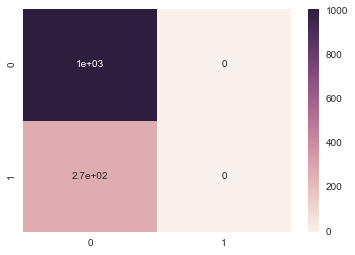

In [117]:
sb.heatmap(confusion_matrix(y,predictions),annot=True)

#1e+03the true positive is 1000 Predicted low, and actual is low
#2.72+02 is predicted it will be low but it acually is not now - false positive
#0 for predicted not low and acually low
#0 for predicted not low and it is not low
#if these numbers are correct
#0/(0+2700)/


In [118]:
###################  ridge model
from sklearn.linear_model import Ridge

In [119]:
#Prepare a Range of Alpha Values to Test
alphas = np.array([100,10,1,0.1,0.01,0.001,0.0001,0])
#which hyperparmeters we want to test
# look to see what you can test with ridge
alphas
model = Ridge()

In [120]:
grid = GridSearchCV(estimator=model, param_grid={'alpha': alphas,})
#a dictionary for param_grid  feed the dictionary to alpha
grid.fit(XState,ySalary)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+02,   1.00000e+01,   1.00000e+00,   1.00000e-01,
         1.00000e-02,   1.00000e-03,   1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [121]:
#Summarize the Results of the Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-1.41161170037
100.0


In [122]:
best_model=grid.best_estimator_
best_model.score(XState,ySalary)

0.00059806545853791082

In [123]:
#x=count_vectorizer.fit_transform(data.title).todense()
#This builds a matrix with a row per website (or data point) and column per word (using all words in the dataset)
X = v.fit_transform(salaryDummies.low).todense()
X = pd.DataFrame(XState, columns=v.get_feature_names())
X.head()
#Prepare a Range of Alpha Values to Test
alphas = np.array([100,10,1,0.1,0.01,0.001,0.0001,0])
#which hyperparmeters we want to test
# look to see what you can test with ridge
alphas
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid={'alpha': alphas,})
#a dictionary for param_grid  feed the dictionary to alpha
grid.fit(X,y)
print(grid)
#Summarize the Results of the Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
best_model=grid.best_estimator_
best_model.score(X,y)

AttributeError: 'DataFrame' object has no attribute 'low'